In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
epochs = 4
batch_size = 4
learn_rate = 0.00001

train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [59000, 1000])

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

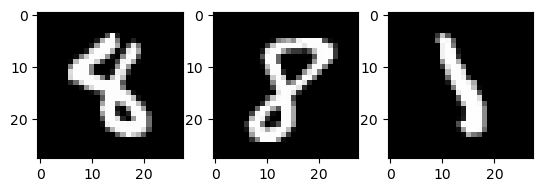

In [3]:
examples = iter(train_loader)
samples, labels = next(examples)
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i+1][0], cmap='gray')
plt.show()

In [6]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

class ConvNet(nn.Module):
	def __init__(self):
		super(ConvNet, self).__init__()
		self.conv1 = nn.Conv2d(1, 16, 5, 1, 2)
		self.pool = nn.MaxPool2d(2,2)
		self.conv2 = nn.Conv2d(16, 32, 5, 1, 2)
		self.fc1 = nn.Linear(32*7*7, 128)
		self.fc2 = nn.Linear(128, 10)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = x.view(-1, 32*7*7)
		x = F.relu(self.fc1(x))
		x = self.fc2(x)
		return x

In [7]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learn_rate)

n_total_steps = len(train_loader)
loss_hist = np.empty(0)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_temp = loss.to("cpu")
        loss_temp = loss_temp.detach().numpy()
        loss_hist = np.append(loss_hist, loss_temp)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item()}")
print("Finished Training")

Epoch [1/4], Step [2000/14750], Loss: 1.3128650188446045
Epoch [1/4], Step [4000/14750], Loss: 0.2553103268146515
Epoch [1/4], Step [6000/14750], Loss: 0.24226023256778717
Epoch [1/4], Step [8000/14750], Loss: 0.34110912680625916
Epoch [1/4], Step [10000/14750], Loss: 1.0597217082977295
Epoch [1/4], Step [12000/14750], Loss: 0.2213898003101349
Epoch [1/4], Step [14000/14750], Loss: 0.12115820497274399
Epoch [2/4], Step [2000/14750], Loss: 0.12995865941047668
Epoch [2/4], Step [4000/14750], Loss: 0.6060366630554199
Epoch [2/4], Step [6000/14750], Loss: 0.12378751486539841
Epoch [2/4], Step [8000/14750], Loss: 0.6420478820800781
Epoch [2/4], Step [10000/14750], Loss: 0.036289677023887634
Epoch [2/4], Step [12000/14750], Loss: 0.13301336765289307
Epoch [2/4], Step [14000/14750], Loss: 0.1633496880531311
Epoch [3/4], Step [2000/14750], Loss: 0.26526013016700745
Epoch [3/4], Step [4000/14750], Loss: 0.018207335844635963
Epoch [3/4], Step [6000/14750], Loss: 0.08001002669334412
Epoch [3/4], 

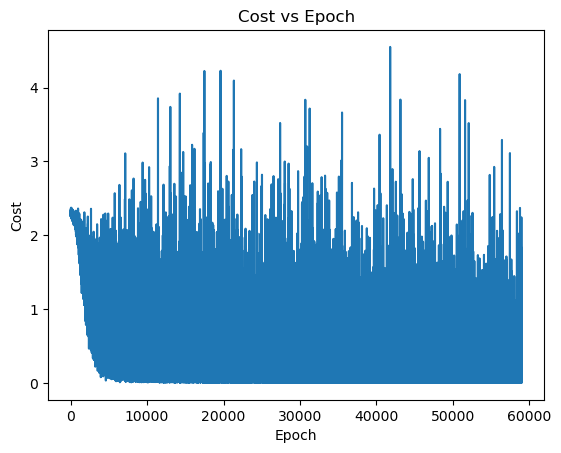

In [8]:
plt.plot(range(1, len(loss_hist) + 1), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.show()

In [ ]:
print(loss_hist)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for val_images, val_labels, in val_loader:
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        outputs = model(val_images)

        _, val_predicted = torch.max(outputs, 1)

        #n_samples += val_labels.size()
        #n_correct += (val_predicted == val_labels).sum().item()
        
        #for i in range(batch_size):
         #   val_label = val_labels[i]
         #   val_pred = val_predicted[i]
          #  if (val_label == val_pred):
           #     n_class_correct[val_label] += 1
            #n_class_samples[val_label] += 1
  
    val_predicted = val_predicted.to("cpu")
    val_labels = val_labels.to("cpu")
    
    val_predicted = val_predicted.numpy()
    val_labels = val_labels.numpy()

    
    print(f"Validation Set Metrics:\n\nAccuracy: {accuracy_score(val_predicted, val_labels)}")
    print(f"Precision: {precision_score(val_predicted, val_labels, average = 'macro')}")
    print(f"Recall: {recall_score(val_predicted, val_labels, average = 'macro')}")
    print(f"Macro F1 Score: {f1_score(val_predicted, val_labels, average = 'macro')}")
    print(f"Micro F1 Score: {f1_score(val_predicted, val_labels, average = 'micro')}")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


with torch.no_grad():
	n_correct = 0
	n_samples = 0
	n_class_correct = [0 for i in range(10)]
	n_class_samples = [0 for i in range(10)]
	for test_images, test_labels, in test_loader:
		test_images = test_images.to(device)
		test_labels = test_labels.to(device)
		outputs = model(test_images)
        
        _, test_predicted = torch.max(outputs, 1)
        n_samples += test_labels.size()
        n_correct += (test_predicted == test_labels).sum().item()

	for i in range(batch_size):
		test_label = test_labels[i]
		test_pred = test_predicted[i]
		if (test_label == test_pred):
			n_class_correct[test_label] += 1
		n_class_samples[test_label] += 1

	test_predicted = test_predicted.to("cpu")
	test_labels = test_labels.to("cpu")

	test_predicted = test_predicted.numpy()
	test_labels = test_labels.numpy()

	print(f"Test Set Metrics:\n\nAccuracy: {accuracy_score(test_predicted, test_labels)}")
	print(f"Precision: {precision_score(test_predicted, test_labels, average = 'macro')}")
	print(f"Recall: {recall_score(test_predicted, test_labels, average = 'macro')}")
	print(f"Macro F1 Score: {f1_score(test_predicted, test_labels, average = 'macro')}")
	print(f"Micro F1 Score: {f1_score(test_predicted, test_labels, average = 'micro')}")

In [ ]:
cm = confusion_matrix(Y_test, test_predictions)
cm_df = pd.DataFrame(cm, index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


plt.figure(figsize=(15,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()